In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from IPython.display import display, Latex
from sympy.vector import CoordSys3D, Del
from IPython.display import display
plt.style.use('rose-pine-moon')
my_cmap = plt.get_cmap('viridis')
%matplotlib inline

### Circulation Form of Green's Theorem

#### Calculating Line Integral using Green's Theorem

Let D be an open, simply connected region with a boundary curve C that is a piecewise smooth, simple closed curve oriented counterclockwise. Let $F=\langle P,Q\rangle$ be a vector field with component functions that have continuous partial derivatives on D. Then,
$$ \oint_C F·d r =\oint_C P\,dx+Q\,dy \\[1em]
=\iint_D (Q_x−P_y)\,dA.
$$

Notice that Green’s theorem can be used only for a two-dimensional vector field F. If F is a three-dimensional field, then Green’s theorem does not apply. Since
$$\displaystyle \int_C P\,dx+Q\,dy=\int_C F· T\,ds$$
this version of Green’s theorem is sometimes referred to as the tangential form of Green’s theorem.

#### Examples

##### Example1

**Example1**: Calculate the line integral:
$$\oint_C (x^2-y^2)\,dx+2xy\,dy$$
where *C* is a traingle with vertices (0,0), (1, 0) and (0, 1).

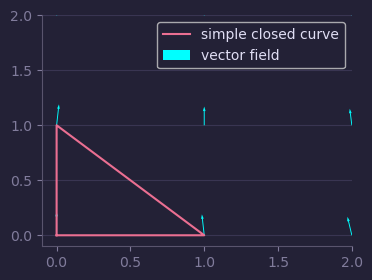

In [2]:
x, y = np.meshgrid(np.linspace(-5, 5, 20), np.linspace(-5, 5,20))
P = x**2 - y**2
Q = 2*x*y

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(1,1,1)
ax.plot([0,1,0,0], [0,0,1,0], label='simple closed curve')
ax.quiver(P, Q, color='cyan', label='vector field')
ax.set_xlim(-0.1, 2)
ax.set_ylim(-0.1, 2)
ax.legend();

Stepwise solution
1. $P = x^2-y^2 \Rightarrow P_y = -2y$
2. $Q = 2xy \Rightarrow Q_x = 2y$

3. $\displaystyle \oint_C (x^2-y^2)\,dx+2xy\,dy \\[1em]
= \int_0^1\int_{0}^{1-x} 2y - (-2y)\;dy\;dx \\[1em]
= \int_0^1\int_{0}^{1-x}4y\;dy\;dx
$

In [3]:
x,y, = sp.symbols('x, y')
P = x**2 - y**2
Q = 2*x*y
expr = sp.diff(Q,x) - sp.diff(P,y)
display(Latex(r'$\displaystyle \oint_C (x^2-y^2)\,dx+2xy\,dy$'))
display(sp.integrate(expr, (y, 0, 1-x), (x, 0, 1)))

<IPython.core.display.Latex object>

2/3

**Analysis**

- If we were to evaluate this line integral without using Green’s theorem, we would need to parameterize each side of the rectangle, break the line integral into four separate line integrals, and use the methods for Line Integrals to evaluate each integral
- Furthermore, since the vector field here is not conservative, we cannot apply the Fundamental Theorem for Line Integrals. Green’s theorem makes the calculation much simpler.

##### Example2

Calculate line integral:
$$\oint_C (x^2y + x^3)\;dx + 2xy\;dy$$
where curve C is bound by $y=x$ and $y=x^2$


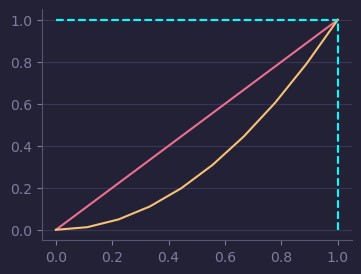

In [4]:
t = np.linspace(0,1,10)
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(1,1,1)
ax.plot(t, t)
ax.plot(t, t**2)
ax.plot([1,1], [0,1], ls='--', color='cyan')
ax.plot([0, 1], [1,1], ls='--', color='cyan');

Stepwise solution:
1. $P = x^2y + x^3 \Rightarrow P_y = x^2$
2. $Q = 2xy \Rightarrow Q_x = 2y$
3. $\displaystyle \oint_C (x^2y + x^3)\;dx + 2xy\;dy = \int_{x=0}^{x=1} \int_{y=x^2}^{y=x}(2y-x)\;dy\;dx$

In [5]:
x, y = sp.symbols('x,y')
f = [x**2 * y + x**3, 2*x*y]
Py = sp.diff(f[0], y)
Qx = sp.diff(f[1], x)
display(Latex(r'$\displaystyle \oint_C (x^2y + x^3)\;dx + 2xy\;dy = $'))
print(sp.integrate(Qx - Py, (y, x**2, x), (x,0, 1)))

<IPython.core.display.Latex object>

1/12


##### Example3

Calculate Line Integral: $\displaystyle \oint_c x^2y\;dx + y^3\;dy$ bounded by C: x = [-1, 1] and $x^2+y^2=1$

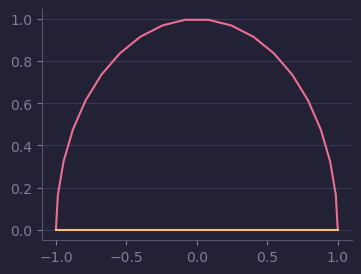

In [6]:
t = np.linspace(0,np.pi, 20)
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(1,1,1)
ax.plot(np.cos(t), np.sin(t))
ax.plot([-1, 1], [0, 0]);

In [7]:
x, y, r, t = sp.symbols('x,y,r,t')
f = [x**2 * y, y**3]
Py = sp.diff(f[0], y)
Qx = sp.diff(f[1], x)
expr = (Qx - Py).subs({x:r*sp.cos(t), y: r*sp.sin(t)})
# when converting to cylindrical we get a scaling factor of r
expr*= r

display(Latex(r'$\displaystyle \oint_c x^2y\;dx + y^3\;dy$'))
display(sp.integrate(expr, (r,0,1), (t,0, sp.pi)))

<IPython.core.display.Latex object>

-pi/8

#### Calculating Area using Green's Theorem

We know Area : $ \iint_R 1\;dA$. So, any $ \oint_C = \iint_R$ given C is is closed region. Now we try to express double integral such as a single integral to get the area:<br><br>
$\displaystyle
A =  \iint_R 1 \;dA \\[1em]
= \frac{1}{2} \iint_R 2 \;dA \\[1em]
= \frac{1}{2}\iint_R [1 - (-1)]\;dA$
<br><br>Comapring with formula of line integral:<br><br>
$\Rightarrow Q_x = 1 \qquad P_y = -1 \\[1em]
\Rightarrow Q = x \qquad P = -y$
<br><br> So the line integral becomes:<br><br>
$\displaystyle A = \frac{1}{2} \oint_C (-y)\;dx+x\;dy$

#### Examples

##### Example1: Area of an Ellipse

Equation of ellipse: $\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1$ 

Equation of ellipse in cylindrical coordinate system: 

$x = a\cos t \qquad y = b\sin t \\[1em]
dx = -a\sin t \qquad dy = b\cos t
$
Substitutting in the area formula:
$$\begin{align*}
A&= \frac{1}{2} = \oint_C - y\;dx + x\;dy \\[1em] 
&= \frac{1}{2} \int_{t=0}^{t=2\pi} (-b \sin t)(-a \sin t)\;dt + (a\cos t)(b\cos t)\;dt \\[1em]
&= \frac{1}{2} \int_0^{2\pi} a\cdot b\;dt = ab \pi
\end{align*}$$

##### Example2

Calculate line integral 
$$ \oint_C \frac{1}{1+x^2}\;dx + (x+\arctan x)\;dy$$ 
where C is bounded by $r^2 = \cos 2\theta$ to right side of x-axis. 

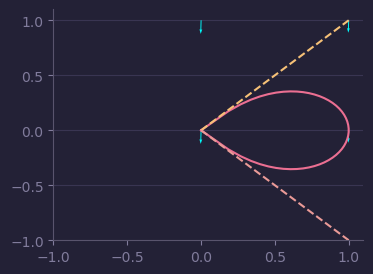

In [8]:
t = np.linspace(-np.pi/4, np.pi/4, 50)
r = np.cos(2*t)**0.5

x, y = np.meshgrid(np.linspace(-5, 5, 20), np.linspace(-5, 5,20))
P = y / (1 + x**2)
Q = (x + np.arctan(x))


fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(1,1,1)
ax.plot(r * np.cos(t),  r * np.sin(t))
ax.plot([0, 1], [0, 1], ls='--')
ax.plot([0, 1], [0, -1], ls='--')
ax.quiver(P, Q, color='cyan')
ax.set_xlim(-1, 1.1)
ax.set_ylim(-1, 1.1);

Stepwise Solution:
1. $P = \frac{y}{1+x^2} \Rightarrow P_y = \frac{1}{1+x^2}$
2. $Q = x + \arctan x \Rightarrow Q_x = 1 + \frac{1}{1+x^2}$ 

3. $\displaystyle \oint_C \frac{1}{1+x^2}\;dx + (x+\arctan x)\;dy = \\[1em]
\int_{-\pi/4}^{\pi/4} \int_0^{\sqrt{\cos (2\theta)}} 1 + \frac{1}{1+x^2} - \frac{1}{1+x^2}r\;dr\;d\theta \\[1em]
\int_{-\pi/4}^{\pi/4} \int_0^{\sqrt{\cos (2\theta)}} r\;dr\;d\theta
$

In [9]:
x, y, r, t = sp.symbols('x,y,r, t')
P = y / (1+x**2)
Q = x + sp.atan(x)
expr = sp.diff(Q, x) - sp.diff(P, y)
display(Latex(r'$\displaystyle \oint_C \frac{1}{1+x^2}\;dx + (x+\arctan x)\;dy$'))
display(sp.integrate(expr*r, (r, 0, sp.cos(2*t)**0.5), (t, -sp.pi/4, sp.pi/4)))

<IPython.core.display.Latex object>

0.500000000000000

### Surface and Flux Integrals

If the curve is not flat than we have to consider 'z' as a variable as well. Then the *Surface Area* becomes:<br><br>
$\displaystyle A = \iint_S f(x,y,z) dS$
<br><br>If we assume *z* as a function of *x* and *y* such that $z = g(x,y)$ than the area can also be expressed as:<br><br>
$\displaystyle \iint_S f(x,y,z)\;dS = \iint_R f(x,y, g(x,y))\sqrt{g_x^2+g_y^2+1}\;dA$
<br><br>Note we  can consider *g* as a function of any pairs of *x,y,z* and the formula can be modified accordingly.

#### Examples

##### Example 1

Calculate the surface area for following:
$$\iint_S (x+2y+z)\;dS$$
where S is bound by $y+z=4$ inside $x^2+y^2=1$.

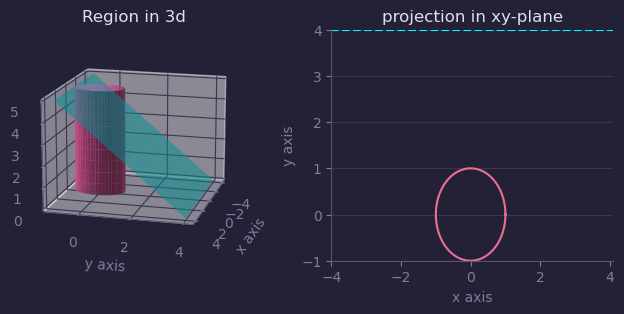

In [10]:
t = np.linspace(0,2*np.pi,100)
z = np.linspace(0, 5, 10)
t, z = np.meshgrid(t,z)
x = np.cos(t)
y = np.sin(t)
u,v = np.meshgrid(np.linspace(-4, 4, 10), np.linspace(-1,4,10))

fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.view_init(azim=15, elev=15)
ax.plot_surface(x, y, z, color='hotpink')
ax.plot_surface(u, v, 4-v, color='cyan', alpha=0.5)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
ax.set_title(r'Region in 3d')


t = np.linspace(0,2*np.pi,100)
ax = fig.add_subplot(1,2,2)
ax.plot(np.cos(t), np.sin(t))
ax.axhline(4, color='cyan', ls='--')
ax.set_xlim(-4, 4.1)
ax.set_ylim(-1, 4)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_title('projection in xy-plane');

Stepwise solution:
1. $z = g(x,y) = 4 - y$

2. $\displaystyle \iint_S (x+2y+z)\;dS = \iint_R (x+2y+(4-y))\sqrt{0^2 + (-1)^2 + 1^2}\;dA \\[1em]
 = \iint_R (x+y+4)\sqrt{2}\;dA
$

3. Parametrizing $dA$ in cylindrical coordinates.<br>
 $\displaystyle = \int_0^{\pi}\int_0^1 (r\cos\theta+r\sin\theta+4)\sqrt{2}r\;drd\theta
$

In [11]:
x,y,z,r,t = sp.symbols('x,y,z,r,t')
f = x + 2*y + z
g = 4-y
# substitutting z = 4-y and multiplying with (gx**2 + gy**2 + 1)
expr = f.subs({z:g}) * sp.sqrt(sp.diff(g,x)**2 + sp.diff(g,y)**2 + 1)

# converting to cylindrical coordinates
expr = expr.subs({x:r*sp.cos(t), y:r*sp.sin(t)})
A = sp.integrate(expr*r, (r,0,1), (t,0,2*sp.pi))
display(Latex(r'$\displaystyle \iint_S (x+2y+z)\;dS = $'))
display(A)

<IPython.core.display.Latex object>

4*sqrt(2)*pi

#### Parametric Surfaces

For a surface given by function $f(x,y,z)$ than $x,y,z$ can be parameterized by $u,v$ such that :
$$x = g(u, v) \qquad y = k(u,v) \qquad z = h(u, v)$$
and 
$$ f(x,y,z) = r(u,v) = x(u,v) \hat{\mathbf{i}} + y(u,v) \hat{\mathbf{j}} + z(u,v) \hat{\mathbf{k}}$$
then surface area is given by:
$$S = \iint_D \lVert r_u \times r_v \rVert \;dA$$

##### Example: Parameterizing Cone

Standard Equation of cone: $x^2 + y^2 = z^2$ <br>
Parametric Equation of cone: $x = r\cos\theta,\; y = r\sin\theta,\; z = r$ <br>
Let $r = u$ and $v = \theta$ for following notations. 

In [12]:
x,y,z,u,v= sp.symbols('x,y,z,u,v', real=True)
# a is constant radius
a = sp.symbols('a', positive=True, constant=True)
f = sp.Matrix([x,y,z])
r = f.subs({x:u*sp.cos(v), y:u*sp.sin(v), z:u})
ru = sp.diff(r, u)
rv = sp.diff(r, v)
ruv = sp.simplify(ru.cross(rv))
S = sp.simplify(sp.sqrt(ruv.dot(ruv)))

surface_area = sp.integrate(S, (u, 0, a), (v, 0, 2*sp.pi))
print('Surface Area:')
display(sp.simplify(surface_area))

Surface Area:


sqrt(2)*pi*a**2

##### Surface Integral of Parametric Surfaces

Surface Integral: $\displaystyle \iint_D f(r(u,v)) \lVert r_u \times r_v \rVert\;dA$

Example: Compute Surface Integral of 
$$\iint_S \frac{x-y}{\sqrt{2z-1}} dS$$
where, $S:r(u,v) = (u+v)\hat{\mathbf{i}}+(u-v)\hat{\mathbf{j}}+(u^2+v^2)\hat{\mathbf{k}}$ and $0\leq u\leq 1,\; 0\leq v\leq 2$.

If f(x,y,z) the is mass density function than surface integral gives the mass.

In [13]:
x,y,z,u,v = sp.symbols('x,y,z,u,v', real=True)

f = (x-y) / sp.sqrt(2*z + 1)
r = sp.Matrix([u+v, u-v, u**2+v**2])
ruv = sp.diff(r, u).cross(sp.diff(r, v))
S = sp.sqrt(sp.simplify(ruv.dot(ruv)))

f = f.subs({x:r[0], y:r[1],z:r[2]})
surface_integral = sp.integrate(f*S, (u, 0, 1), (v, 0, 2))
display(Latex(r'$\displaystyle \iint_S \frac{x-y}{\sqrt{2z-1}}$'))
display(surface_integral)

<IPython.core.display.Latex object>

8

### Flux

If *F* is a vector field and it contains a surface *S* then *F* describes the velocity of flow/field at any point across the surface.

Then the *rate of flow* (amount/volume of flow) across the surface is called the **flux**.
For a vector field *F* and normal vector at any point of surfact *n*

$\displaystyle \text{Flux} = \iint_S F\cdot S =  \iint_S F\cdot n\; dS$

If $F = P \hat{\mathbf{i}} + Q \hat{\mathbf{j}} + R \hat{\mathbf{k}}$

Then flux can be expressed as :
$$\iint_S F\cdot dS = \iint_S F\cdot n\;dS = \iint_D (-Pg_x - Qg_y + R)dA$$
 where $z=g(x,y)$ is the equation of surface. And $D$ is the projection of $g(x,y)$ surface in the xy-plane.


#### Example

Find the Flux of *F* across the surface *S* bound by $z = 1-x^2-y^2$ and $x^2+y^2=1$ where flow is describe by $F = x \hat{\mathbf{i}} + y \hat{\mathbf{j}}+z \hat{\mathbf{k}}$

Soluiton: Calculating $\iint_D(-Pg_x-Qg_y+R) dA$

In [14]:
x,y,z,r,t = sp.symbols('x,y,z,r,t', real=True)
F = sp.Matrix([x,y,z])
g = 1 - x**2 - y**2
expr = -F[0]*sp.diff(g,x) - F[1]*sp.diff(g, y) + F[2]
expr = expr.subs({z: g})

print('Inner expression')
display(expr)

Inner expression


x**2 + y**2 + 1

Converting to polar coordinate leads to our integral to become the following:
$$\int_{\theta=0}^{2\pi}\int_{r=0}^1 (r^2+1)r\;dr\;d\theta$$

In [15]:
expr = sp.simplify(expr.subs({x:r*sp.cos(t),y:r*sp.sin(t)})) * r
flux = sp.integrate( expr,(r, 0, 1), (t,0,2*sp.pi))

display(Latex(r'$\displaystyle \iint_S F \cdot dS =$'))
display(flux)

<IPython.core.display.Latex object>

3*pi/2

We can also express flux as:
$$\iint_S F\cdot dS = \iint_D F(r(u, v)) \cdot (r_u \times r_v) dA$$

### Divergence Theorem

If surface *S* is a simple closed surface than flux can be expressed as:
$$F = \iint_S F\dot dS = \iiint_T \text{Div F}\;dV = \iiint_T \nabla\cdot F\;dV \$$
where:
$$\nabla\cdot F = \frac{\partial P}{\partial x} + \frac{\partial Q}{\partial y} + \frac{\partial R}{\partial z}$$

#### Example 1

Find flux through following vector field:<br><br>
$F = (x + \sin j)\hat{\mathbf{i}} + (2y+\cos x)\hat{\mathbf{j}} + (z + \tan y)\hat{\mathbf{k}}$ <br><br>
with the surface defined as $x^2+y^2+z^2=4$

In [16]:
x, y, z = sp.symbols('x,y,z')
f = [x + sp.sin(z), 2*y + sp.cos(x), 3*z + sp.tan(y)]
# Divergence F
div_f = sp.diff(f[0], x)+sp.diff(f[1], y) + sp.diff(f[2],z)

Now we know from divergence theorem:
$$\text{Flux} = \iint_S F\dot dS = \iiint_T 6 \;dV$$
Since our region represents a sphere we parameterize using spherical coordinates.

$x =  \rho \sin \phi \cos \theta \qquad y = \rho \sin \phi \sin \theta \qquad z = \rho \cos\phi$

and $dV = \rho^2 sin\phi\;d\rho\;d\phi\;d\theta$

So our final expression becomes:
$$\text{Flux} = \int_{\theta=0}^{2\pi} \int_{\phi=0}^{\pi} \int_{\rho = 0}^{2} 6\rho^2 sin\phi\;d\rho\;d\phi\;d\theta$$

In [17]:
rho, phi, theta = sp.symbols('rho, phi, theta')


print(f'Flux :')
display(sp.integrate(6*rho**2*sp.sin(phi), (rho,0,2), (phi, 0, sp.pi), (theta,0, 2*sp.pi)))

Flux :


64*pi

#### Example 2

Calculate the flux for 
$$ F = xy^2 \hat{\mathbf{i}} + yz^2 \hat{\mathbf{j}} + zx^2 \hat{\mathbf{k}}$$
and surface bound by $x^2+y^2=4$ and $0\leq z\leq 5$

In [18]:
x,y,z = sp.symbols('x,y,z')
f = [x*y**2, y*z**2, z*x**2]
div_f = sp.diff(f[0], x) + sp.diff(f[1], y) + sp.diff(f[2], z)
print('divergence of vector field')
display(div_f)

divergence of vector field


x**2 + y**2 + z**2

Since the surface reperesents a cylinder, we parameterize using cylindical coordinates.<br>
$ x= \cos\theta \qquad y = \sin\theta \qquad z=z$ 
<br> and $dV = r\;dr\;d\theta$ <br>
so the final integral becomes:
$\displaystyle \text{Flux} = \int_{\theta=0}^{2\pi}\int_{r=0}^{2}\int_{z=0}^{5} (r^2+z^2)r\;dr\;d\theta$

In [19]:
r, theta = sp.symbols('r,theta', real=True)
div_f = sp.simplify(div_f.subs({x:r*sp.cos(theta),y:r*sp.sin(theta)}))
print('flux through surface:')
display(sp.integrate(div_f*r, (z,0,5), (r,0,2), (theta,0,2*sp.pi)))

flux through surface:


620*pi/3

### Stoke's Theorem

If we have a simple closed curve which is not on a plane, then to line integrals we use Stoke's Theorem which states that:<br>
*"work done along a simple close curve through a vector field is equal to flux or the surface integral of the curl of vector field"*.<br>
Mathematically,<br><br>
$\displaystyle W = \oint F\cdot dr = \iint_S \text{Curl F}\cdot dS = \iiint_T \text{Div(Curl F)}\;dV \\[1em]
= \iint_D (-Pg_x-Qg_y+R)\;dA$
<br>where *S* is a surface described as $z=g(x,y)$

#### Example 1

Calculate the line integral for following:<br><br>
$F(x,y,z) = \cos z \hat{\mathbf{i}} + x^2 \hat{\mathbf{j}} + 2y \hat{\mathbf{k}}$
<br><br> and the curve *C* defined by $z=2-x$ and $x^2+y^2=4$

In [20]:
x,y,z = sp.symbols('x,y,z')
C = CoordSys3D('C')
f = sp.cos(C.z)*C.i + C.x**2 * C.j + 2*C.y * C.k
g = 2-x
delop = Del()
curl_f = delop.cross(f).doit()
expr = - curl_f.dot(C.i)*sp.diff(g, x) - curl_f.dot(C.j)*sp.diff(g,y) + curl_f.dot(C.k)

print('curl of vector field :')
display(curl_f)
display(Latex(r'$-Pg_x -Qg_y + R =$'))
display(expr)

curl of vector field :


2*C.i + (-sin(C.z))*C.j + 2*C.x*C.k

<IPython.core.display.Latex object>

2*C.x + 2

Since the bound region is an intersection of a plane and a cylinder, we can parameterize using cylindrical coordinates system.<br>
$x=\cos\theta\qquad y=\sin\theta \qquad z= z$
<br>So final line integral becomes:<br><br>
$\displaystyle W = \int_{\theta=0}^{2\pi}\int_{r=0}^{2} (2 + 2\cos\theta) r\;dr\;d\theta$

In [21]:
r, theta = sp.symbols('r,theta', real=True)
expr = expr.subs({C.x : r*sp.cos(theta), C.y: r*sp.sin(theta)})

print(f'Work done by the field over curve C =')
display(sp.integrate(expr*r, (r,0,2), (theta, 0, 2*sp.pi)))

Work done by the field over curve C =


8*pi